In [35]:
%reload_ext autoreload
%autoreload 2


In [38]:
import datasets
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

x,y,metadata = datasets.load_mohr()
x,y,metadata = datasets.load_liu()
print(x)

Index(['col1', 'Unnamed: 0', '_RAJ2000_1', '_DEJ2000_1', 'LAMOST_sep', 'umag',
       'gmag', 'rmag', 'Hamag', 'imag', 'Jmag', 'Hmag', 'Kmag',
       'original_index', 'model_prob', 'H_alfa'],
      dtype='object')
        umag    gmag   rmag   imag  Hamag    Jmag    Hmag    Kmag
0     14.769  14.900  13.52  12.96  12.83  12.013  11.716  11.386
1     14.439  14.518  13.78  13.34  13.13  12.491  12.212  11.924
2     14.410  14.290  13.33  12.74  12.54  11.810  11.480  11.190
3     14.410  14.290  13.33  12.74  12.54  11.810  11.480  11.190
4     14.060  14.000  12.83  12.34  12.10  11.790  11.510  11.250
...      ...     ...    ...    ...    ...     ...     ...     ...
1067  17.800  16.840  14.42  12.95  13.92  10.600   9.970   9.620
1068  18.240  16.870  14.49  13.00  14.01  10.720  10.100   9.790
1069  18.370  17.090  14.41  12.68  13.86  10.120   9.430   9.020
1070  18.810  17.450  14.65  12.88  14.09  10.340   9.650   9.290
1071  17.700  16.240  14.35  13.10  14.16  10.710  10.170  

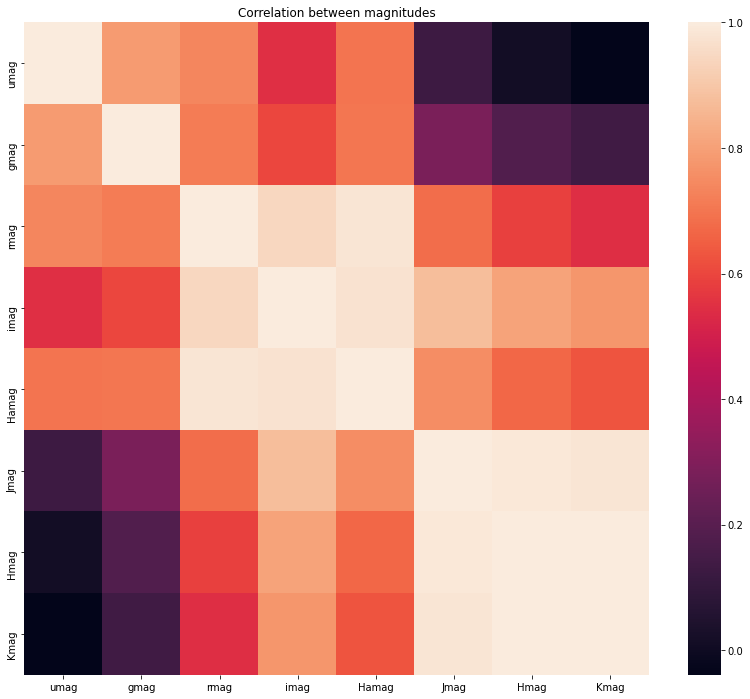

In [30]:
f=plt.figure(figsize = (14,12))
sn.heatmap(x.corr())
plt.title("Correlation between magnitudes")
plt.show()

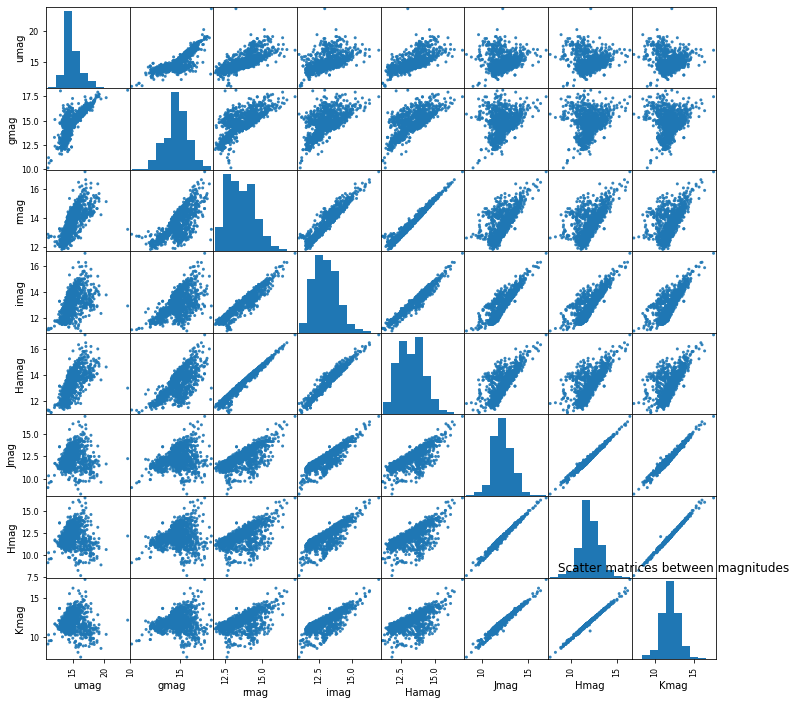

In [31]:
axes=pd.plotting.scatter_matrix(x,alpha=0.9,grid=False,figsize=(12,12))

# for al in axes:
#     for ax in al:
# #         ax.set_xticks([])
# #         ax.set_yticks([])
plt.title("Scatter matrices between magnitudes")
plt.show()

In [32]:
x_np=x.to_numpy()
import qfeatures
coefficients = datasets.get_coefficients("mohr")
coefficients_np = np.array([coefficients[k] for k in x.columns])
q=qfeatures.calculate_q(x_np,coefficients_np,combinations=3)
print(x_np.shape,x_np.min(),x_np.max())
print(q.shape,q.min(),q.max())



(1072, 8) 7.38 23.71
(1072, 56) -4.748878832792958 11.53397299675776


(56, 56) -0.9671112627746423 1.0 0.5288797425173568


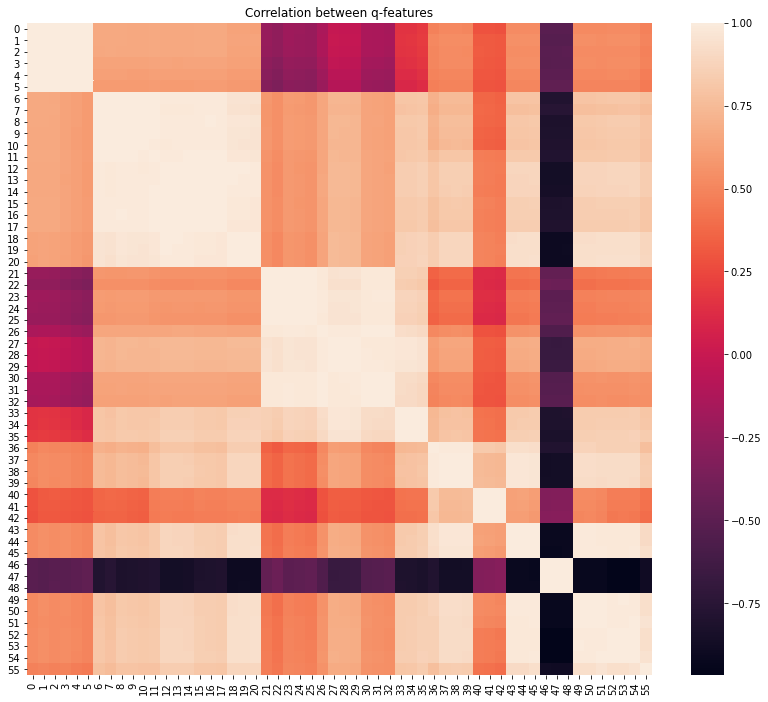

ValueError: Shape of passed values is (1072, 56), indices imply (1072, 4)

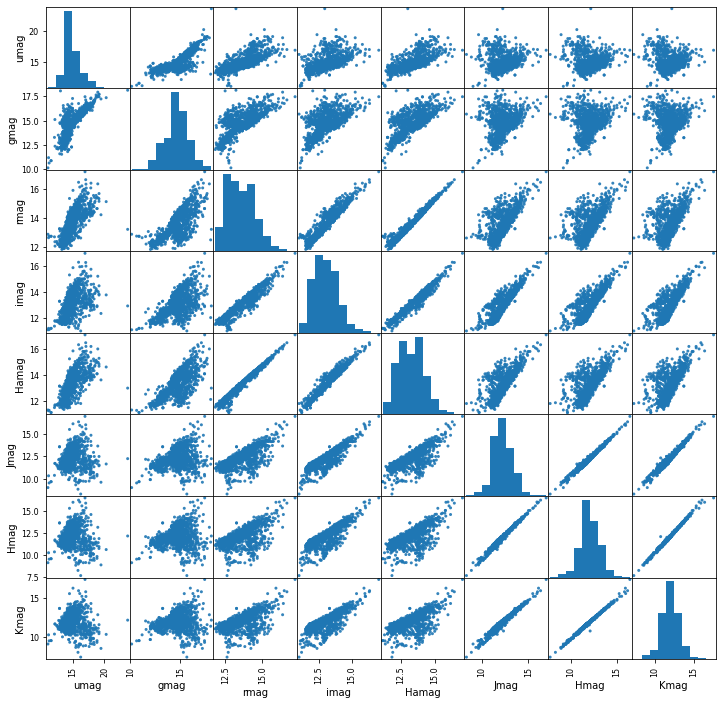

In [33]:
f=plt.figure(figsize = (14,12))

cm=np.corrcoef(q,rowvar=False)
print(cm.shape,cm.min(),cm.max(),cm.mean())
sn.heatmap(cm)

plt.title("Correlation between q-features")
plt.show()

axes=pd.plotting.scatter_matrix(x,alpha=0.9,grid=False,figsize=(12,12))
q_df = pd.DataFrame(q, columns = [])
# for al in axes:
#     for ax in al:
# #         ax.set_xticks([])
# #         ax.set_yticks([])
plt.title("Scatter matrices between q-features")
plt.show()